## Exploratory Data Analysis

### Importing Data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('marketing_campaign1.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


### Data Pre-processing

In [3]:
# Changing Categorical columns to category type from object type

for i in df.select_dtypes('object').columns:
    df[i] = df[i].astype('category')

### Visualizations

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

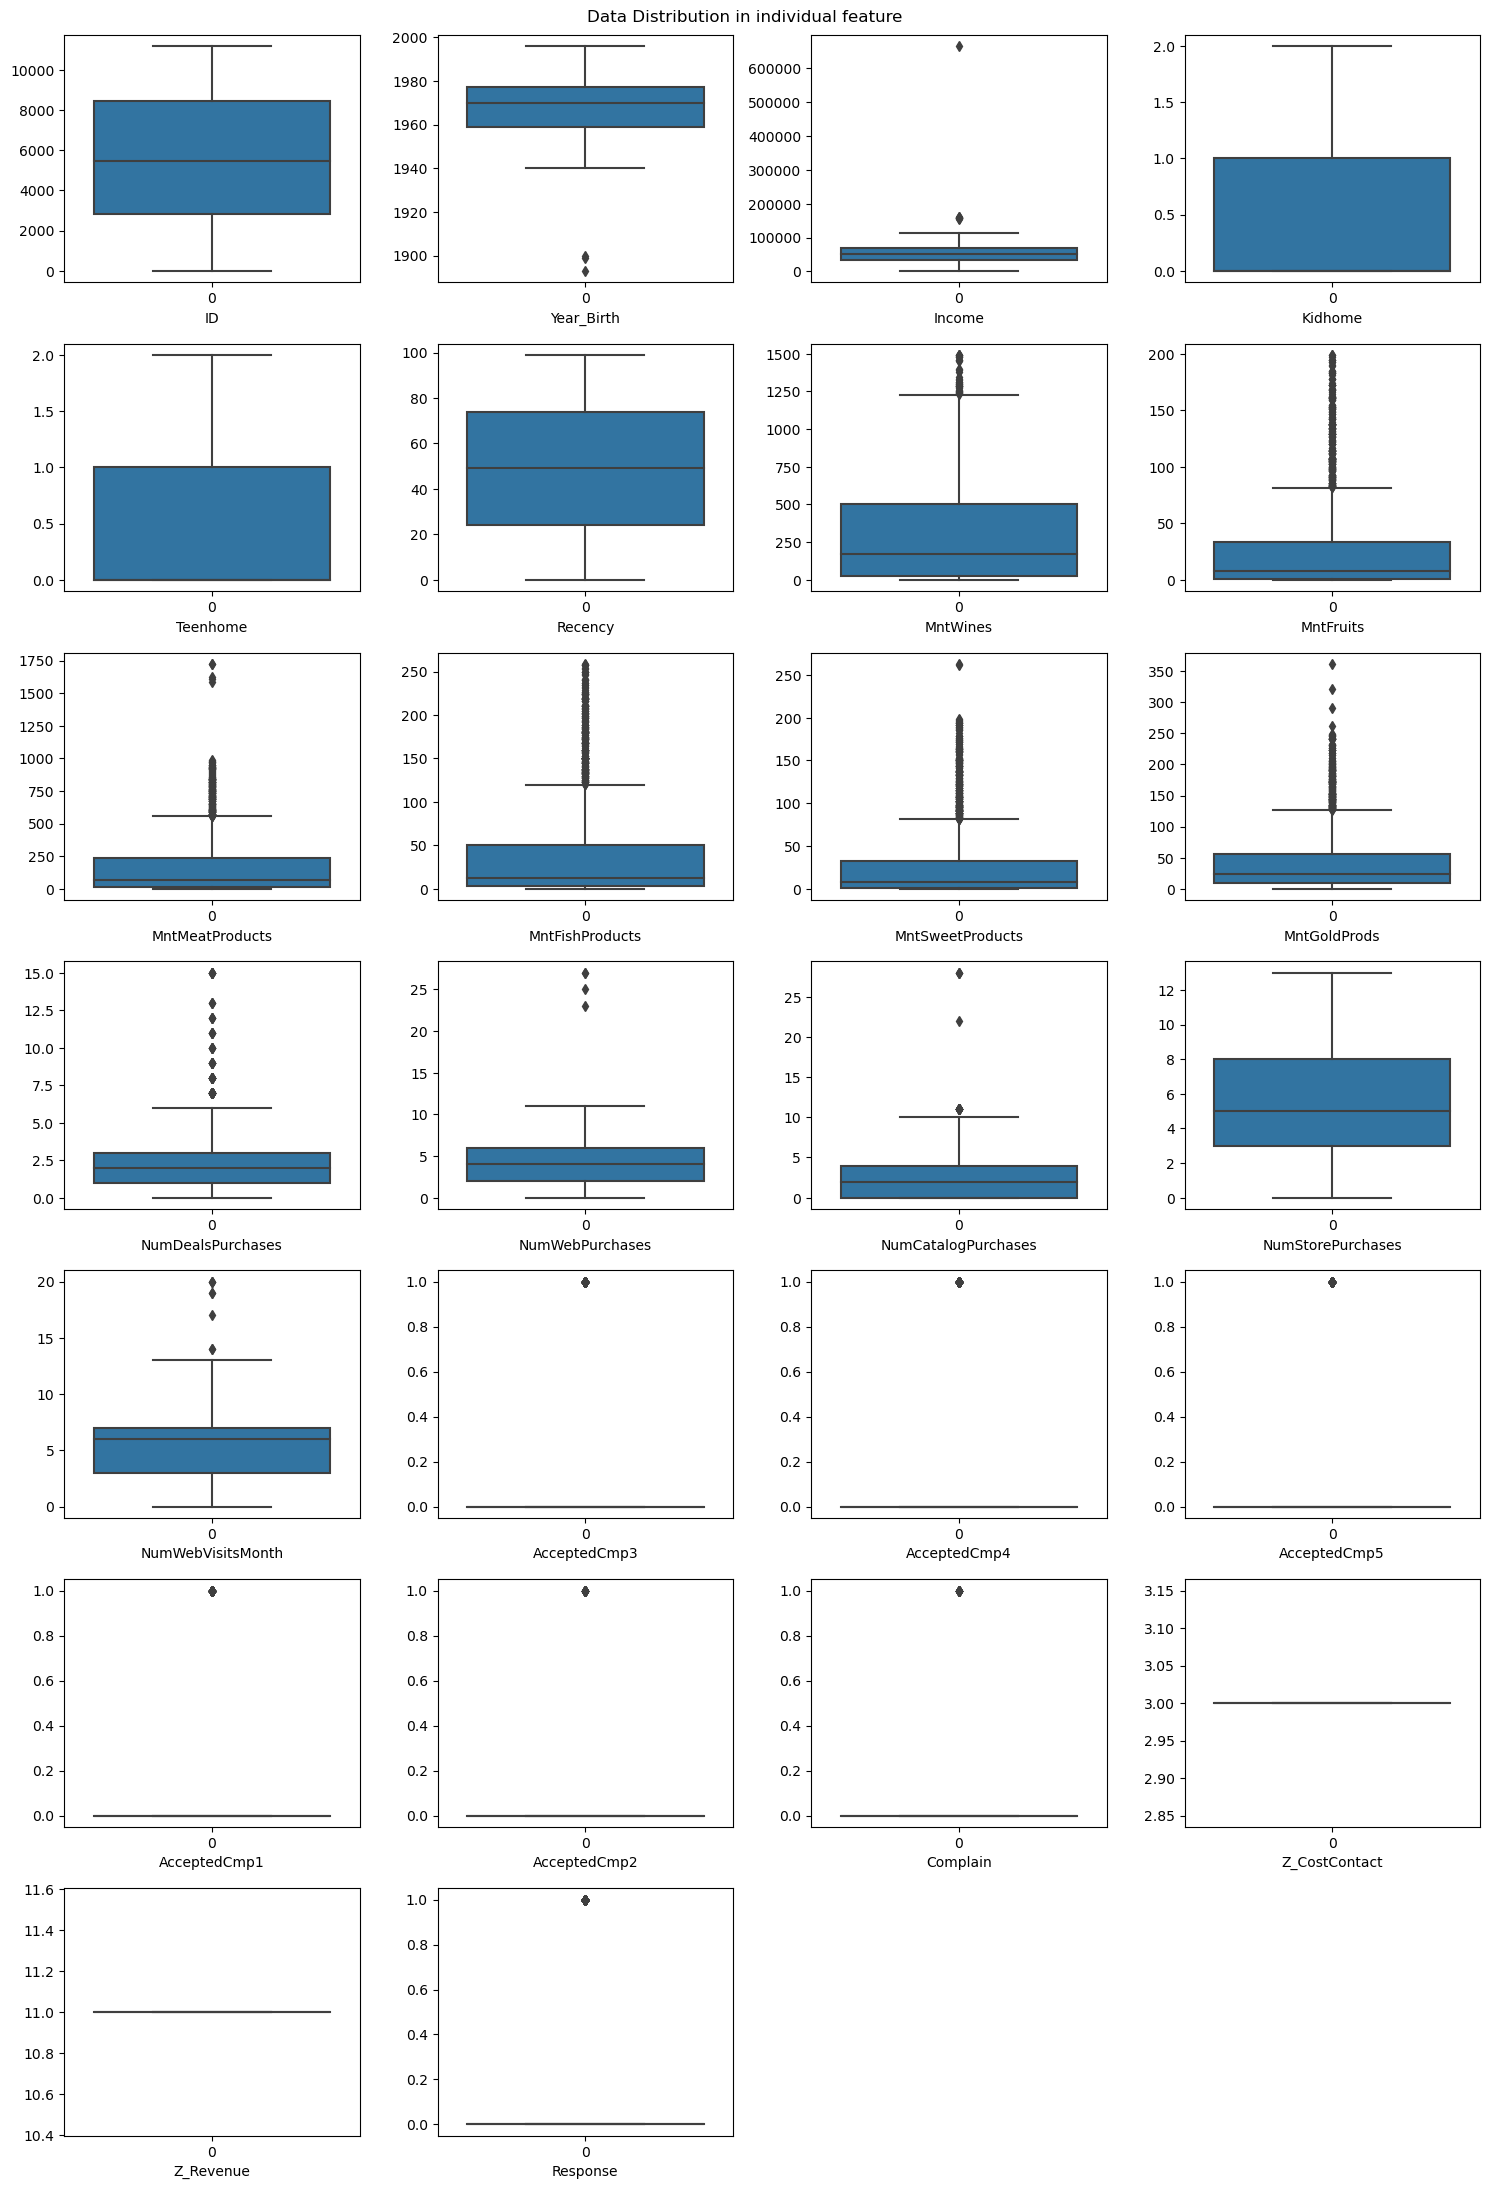

In [5]:
# Checking for outliers

columns = df.select_dtypes(['int64', 'float']).columns
plt.figure(figsize=(15,25))
for i, col in enumerate(df[columns]):
    plt.subplot(8, 4, i+1)
    sns.boxplot(df[col])
    plt.xlabel(col)
plt.tight_layout()
plt.suptitle("Data Distribution in individual feature")
plt.subplots_adjust(top=0.97)
plt.show()

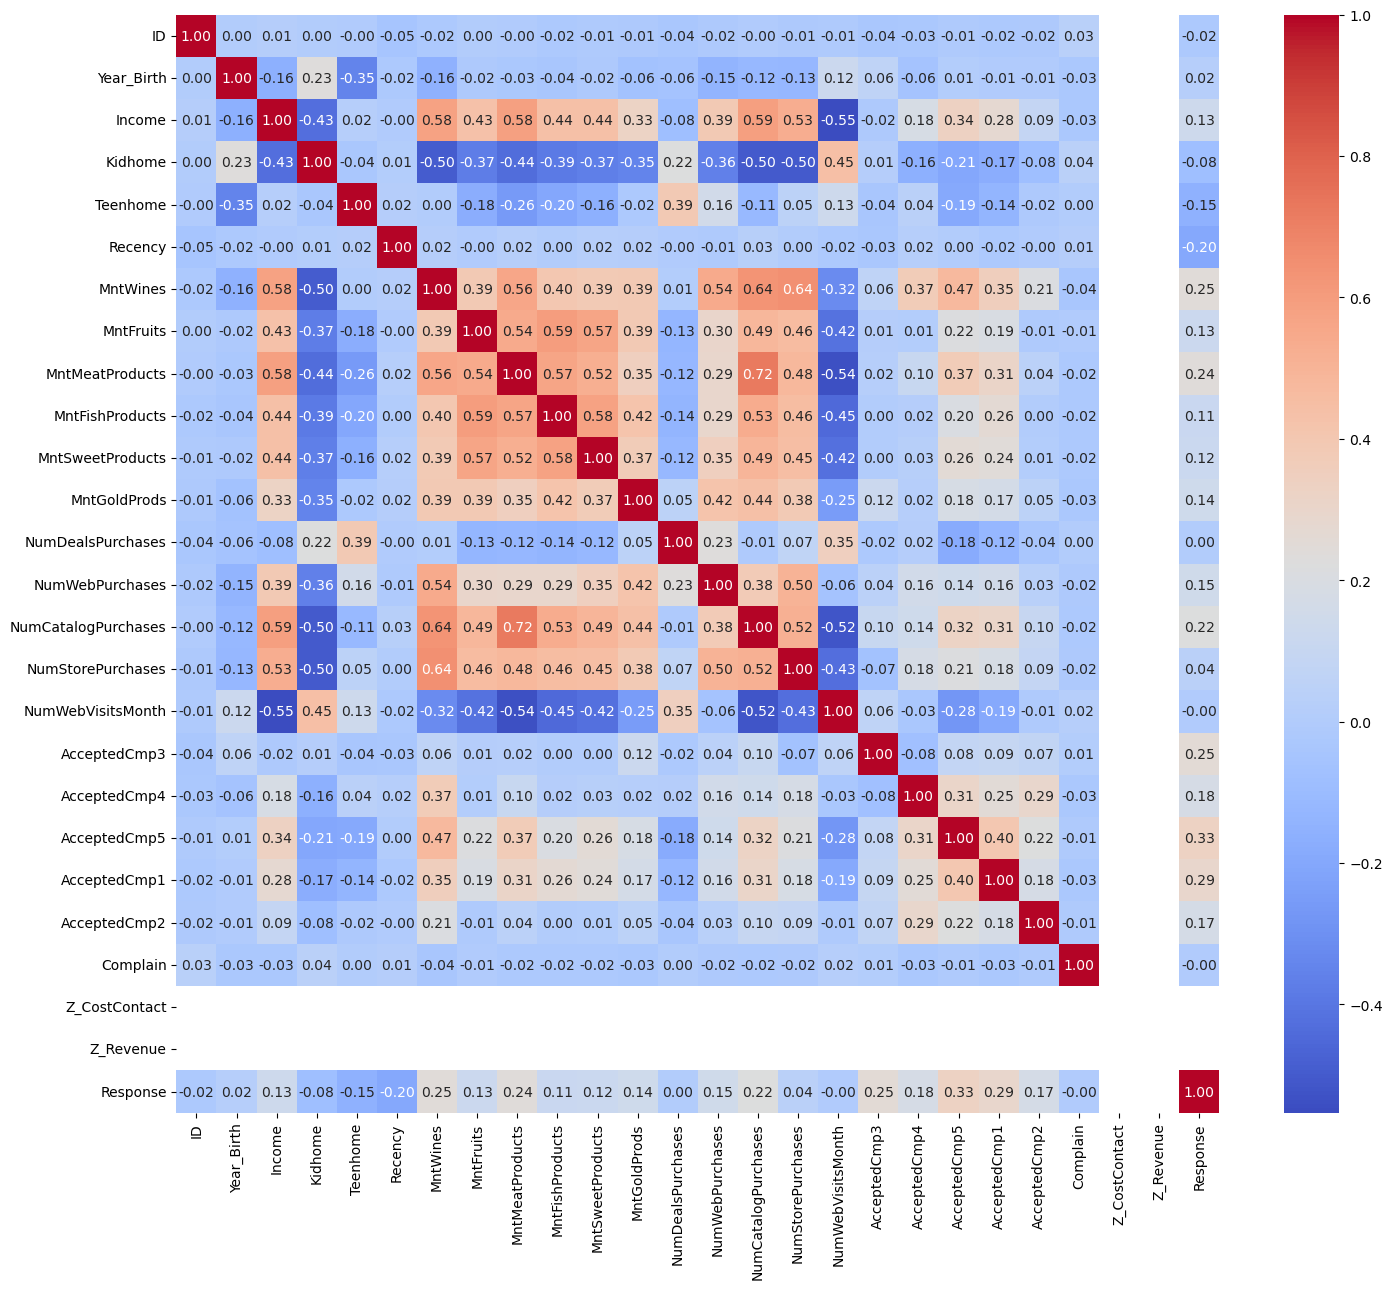

In [6]:
# Checking for corelation between variables

plt.figure(figsize=(15, 13))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.tight_layout()
plt.show()

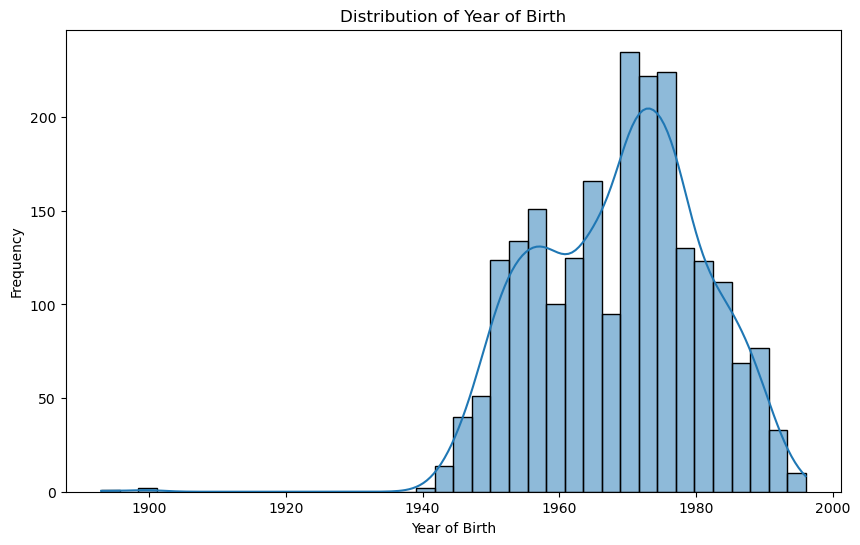

In [7]:
# Distribution of Year_Birth

plt.figure(figsize=(10, 6))
sns.histplot(df['Year_Birth'], kde=True)
plt.title('Distribution of Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.show()

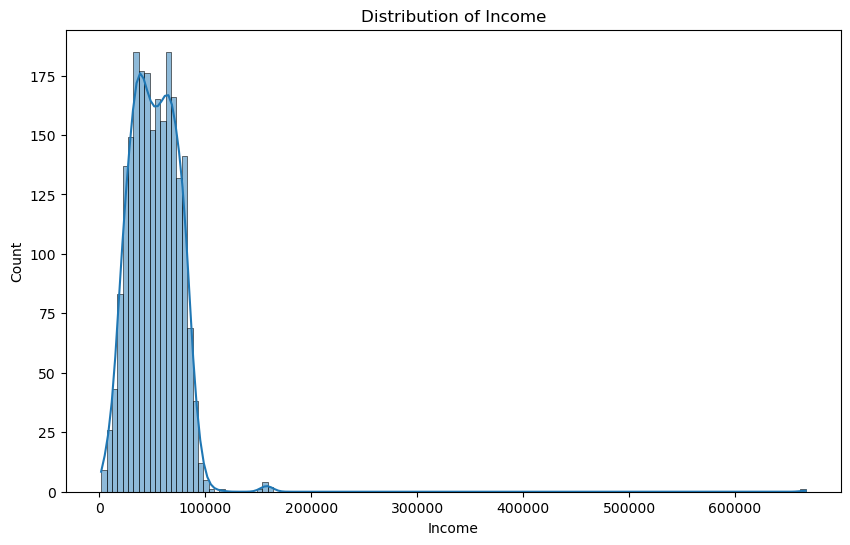

In [8]:
# Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True)
plt.title('Distribution of Income')
plt.show()

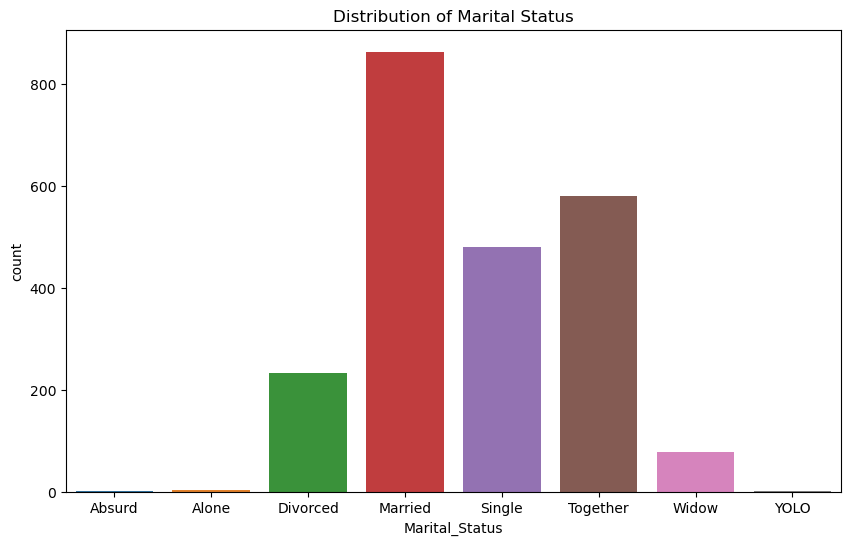

In [9]:
# Distribution of Marital_Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=df)
plt.title('Distribution of Marital Status')
plt.show()

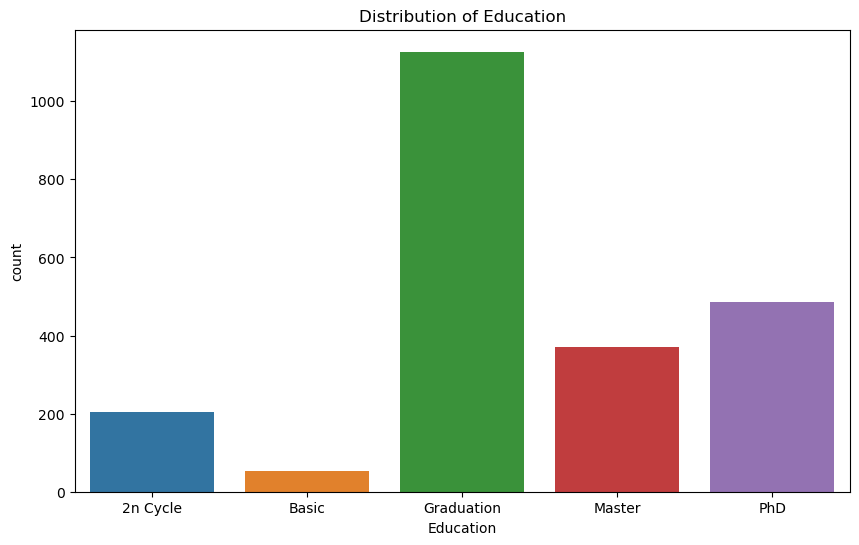

In [10]:
# Distribution of Education
plt.figure(figsize=(10,6))
sns.countplot(x='Education', data=df)
plt.title('Distribution of Education')
plt.show()

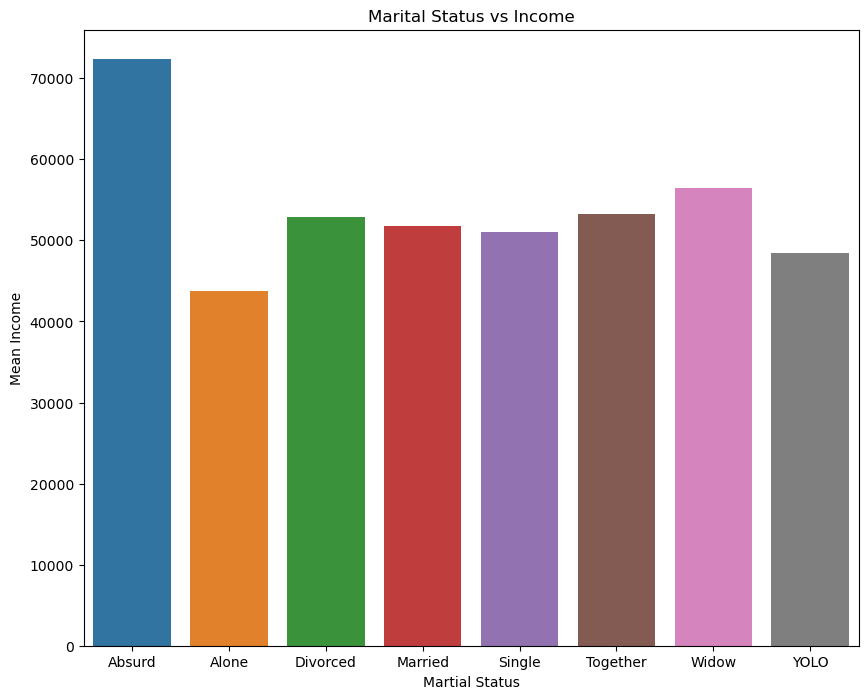

In [11]:
# Marital Status vs Income
a = df.groupby(by='Marital_Status')
a = a.mean(numeric_only=True)['Income']
a = pd.DataFrame(a, columns=['Income']).rename_axis(None)

plt.figure(figsize=(10, 8))
sns.barplot(x=a.index, y=a.Income)
plt.xlabel('Martial Status')
plt.ylabel('Mean Income')
plt.title('Marital Status vs Income')
plt.show()

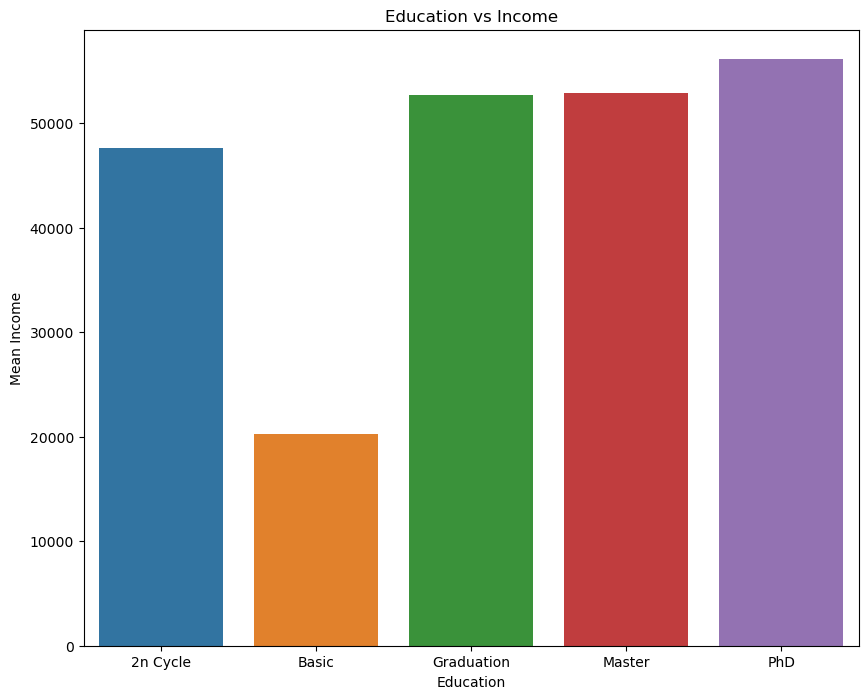

In [12]:
# Education vs Income
a = df.groupby(by='Education')
a = a.mean(numeric_only=True)['Income']
a = pd.DataFrame(a, columns=['Income']).rename_axis(None)

plt.figure(figsize=(10, 8))
sns.barplot(x=a.index, y=a.Income)
plt.xlabel('Education')
plt.ylabel('Mean Income')
plt.title('Education vs Income')
plt.show()

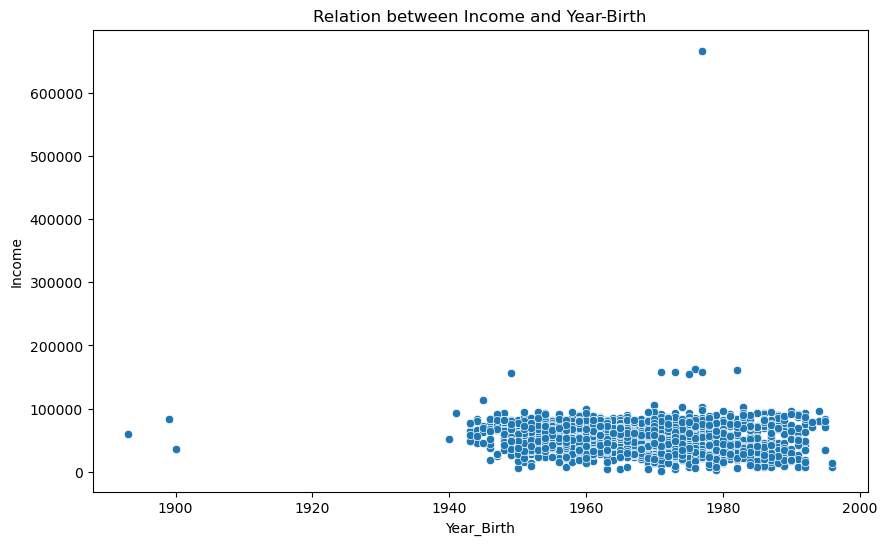

In [13]:
# Relationship between Income and Year of Birth
plt.figure(figsize=(10,6))
sns.scatterplot(y='Income', x='Year_Birth', data=df)
plt.title('Relation between Income and Year-Birth')
plt.show()

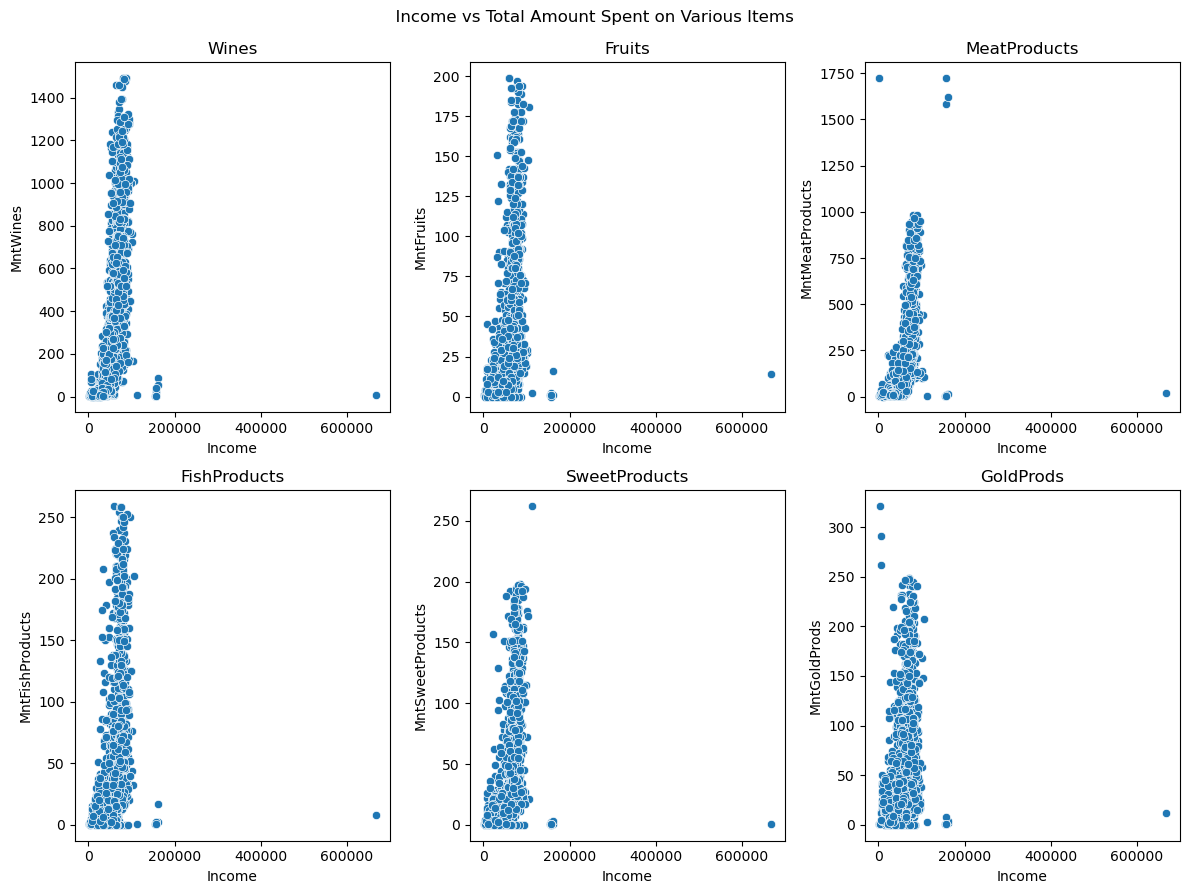

In [14]:
# Relationship between Income and Total Amount Spent on Various Items
plt.figure(figsize=(12,13))
for i, col in enumerate(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x='Income', y=col, data=df)
    plt.xlabel('Income')
    plt.title(col[3:])
plt.suptitle('  Income vs Total Amount Spent on Various Items  ')
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()